# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Thandokazi,Dlamini**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#load the data 
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
df_train.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_test.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [7]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [8]:
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


C:\Users\USER\AppData\Local\Temp\ipykernel_14444\3400767214.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.kurtosis().plot()


<Axes: >

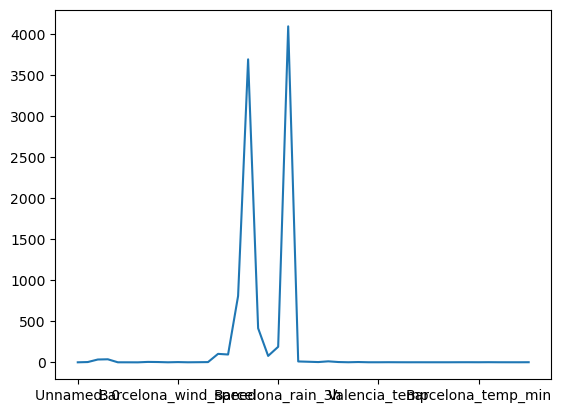

In [10]:
# plot relevant feature interactions
df_train.kurtosis().plot()

C:\Users\USER\AppData\Local\Temp\ipykernel_14444\3029453150.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.skew(axis=0, skipna=True).plot()


<Axes: >

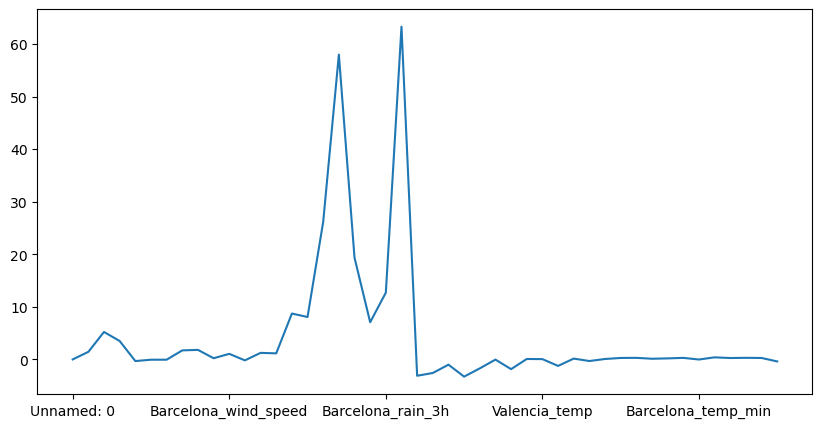

In [11]:
#Checking for outliers in the different columns
plt.figure(figsize = [10,5])
df_train.skew(axis=0, skipna=True).plot()

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

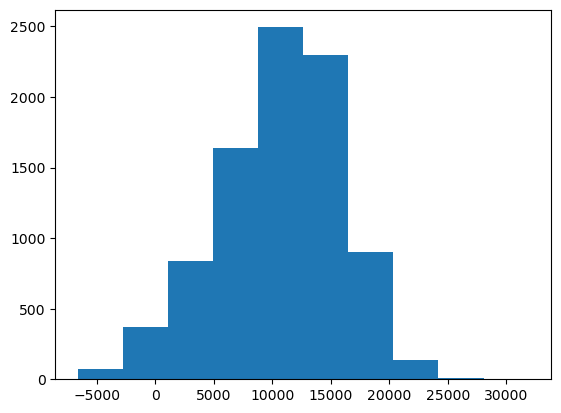

In [12]:
plt.hist(df_train['load_shortfall_3h'])

C:\Users\USER\AppData\Local\Temp\ipykernel_14444\948025094.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax, );


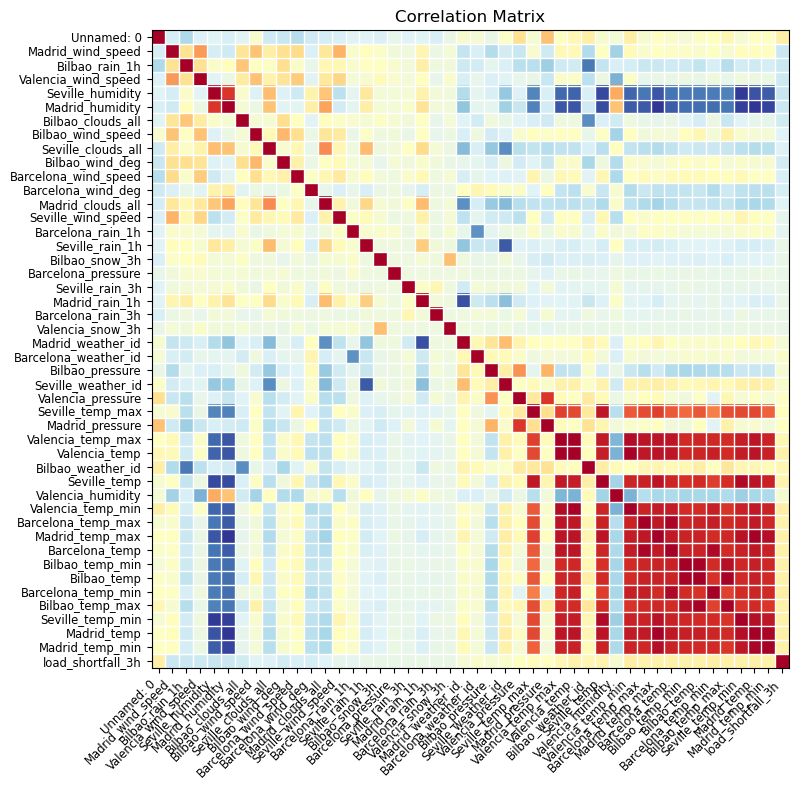

In [14]:
# evaluate correlation
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax, );

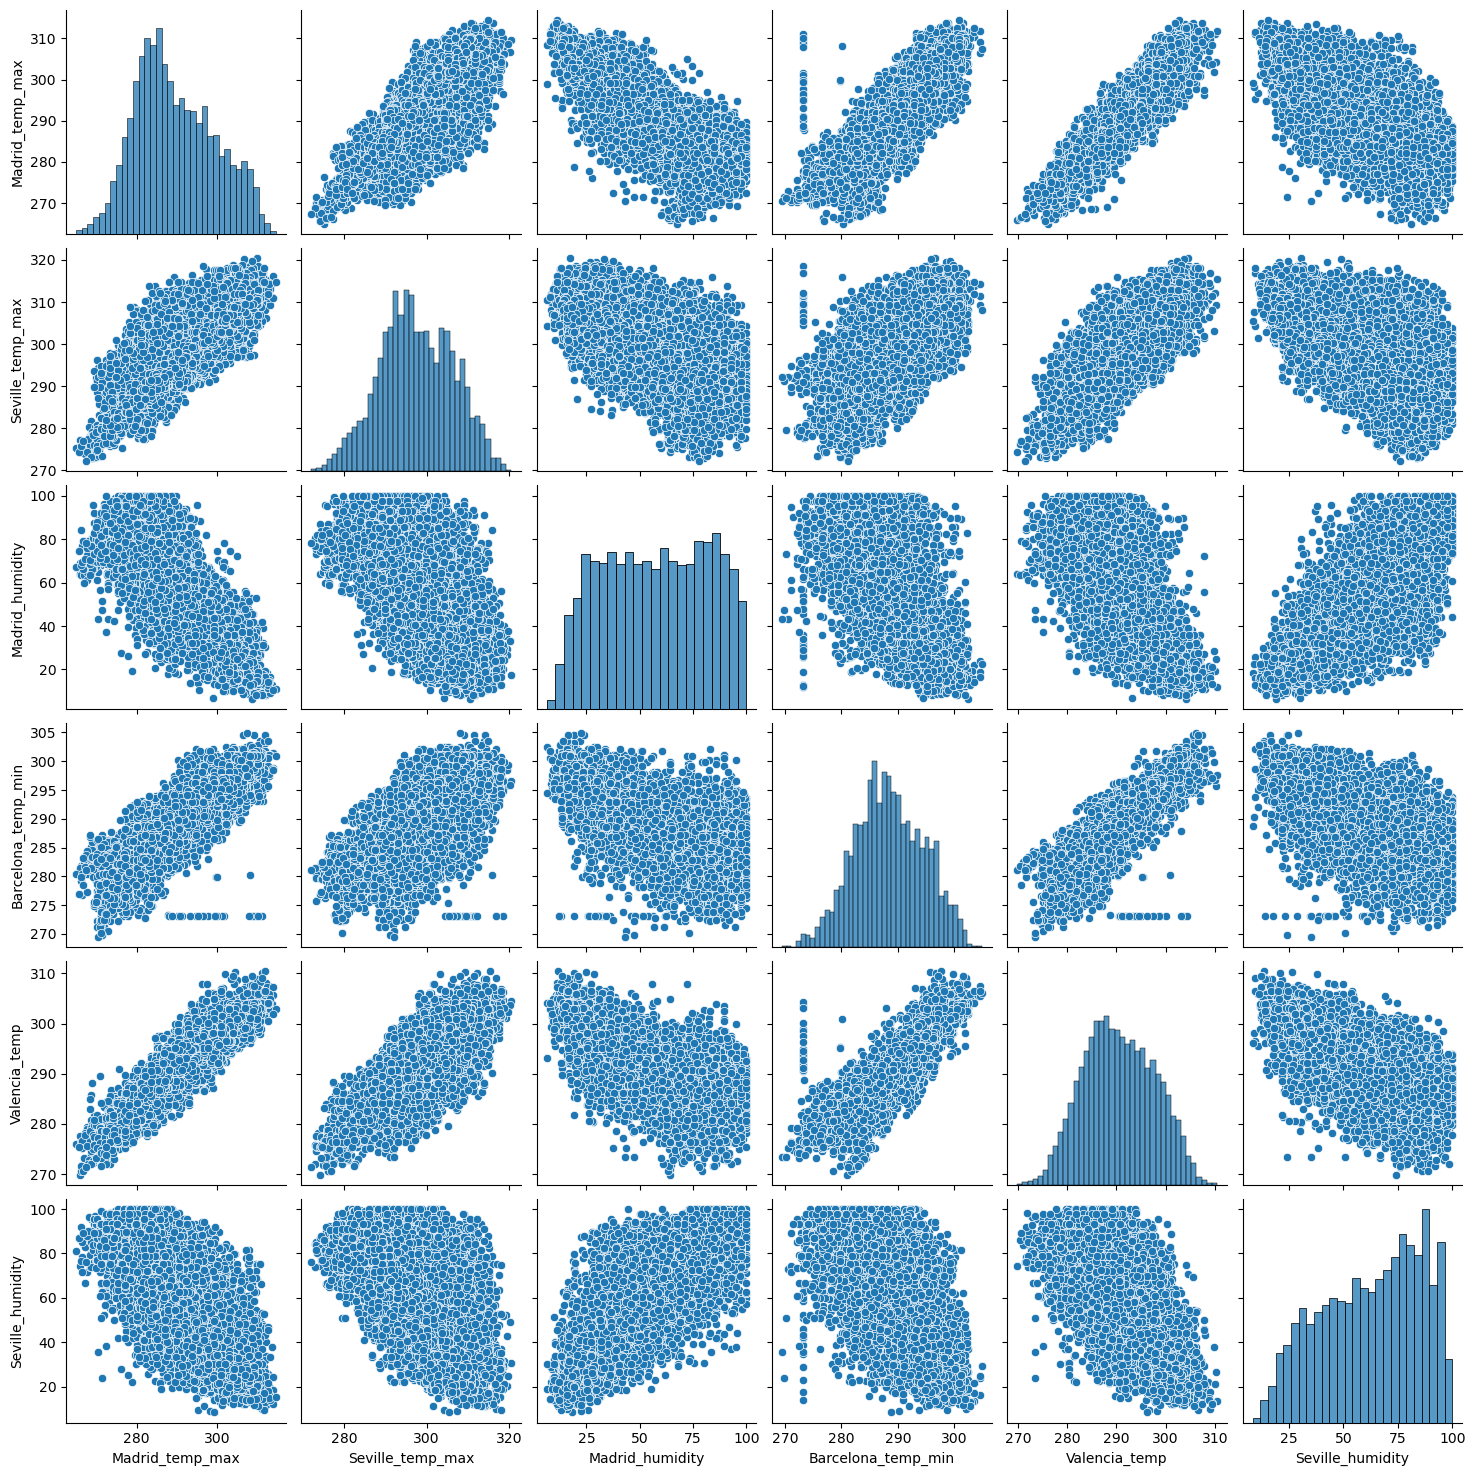

In [15]:
sns.pairplot(df_train[['Madrid_temp_max', "Seville_temp_max", 'Madrid_humidity',"Barcelona_temp_min", "Valencia_temp", "Seville_humidity"]])
plt.show()

<Axes: >

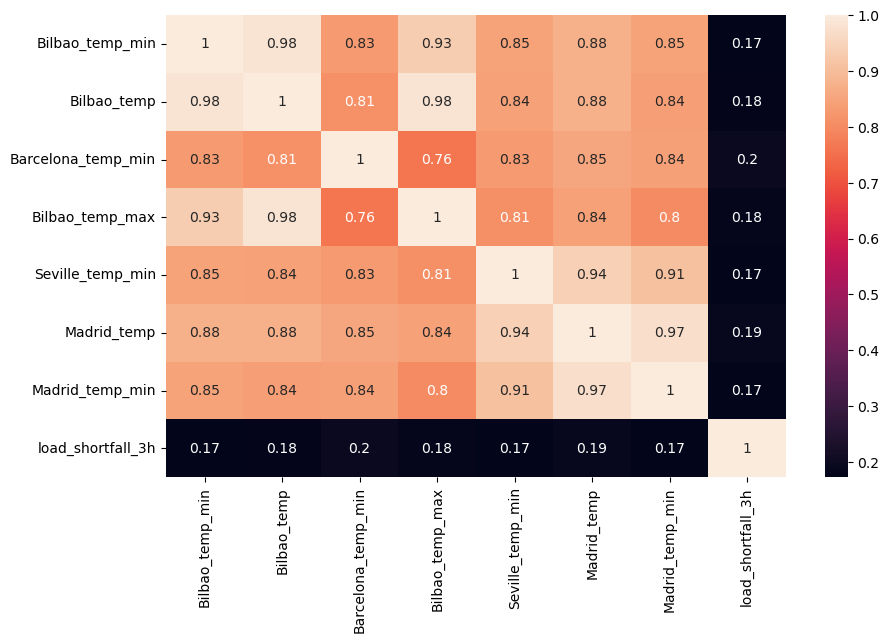

In [17]:
Time_df =df_train.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True 

In [18]:
print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.0514065222798
Median
1015.0


In [19]:
#data cleaning
df_modified = df_train
# Calculating the mode (most frequent value) of the 'Valencia_pressure' column in the 'df_modified' DataFrame.
# This will be used to fill in missing values.
vp_mode_modified = df_modified['Valencia_pressure'].mode()[0]
# Filling missing values in the 'Valencia_pressure' column of 'df_modified' with the calculated mode value.
# This step replaces any NaN (missing) values in this column with the mode value.
df_modified['Valencia_pressure'] = df_modified['Valencia_pressure'].fillna(vp_mode_modified)

In [20]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [21]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [22]:

#Changing datatype to DataTime
df_modified['time'] = pd.to_datetime(df_modified['time'])

# Extracting Numeric Values from 'Valencia_wind_deg'

df_modified['Valencia_wind_deg'] = df_modified['Valencia_wind_deg'].str.extract('(\d+)')
# Converting Extracted Values to Numeric Type
df_modified['Valencia_wind_deg'] = pd.to_numeric(df_modified['Valencia_wind_deg'])


In [23]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   int64         
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

In [24]:
df_modified['time'].head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]

In [25]:
# Define a function to extract hours from a timestamp and convert it to a string
def hr_func(ts):
    return str(ts.hour)

# Create a new column 'time_hour' by applying the 'hr_func' function to the 'time' column
df_modified['time_hour'] = df_modified['time'].apply(hr_func)

# Remove the 'Unnamed: 0' and 'time' columns from the DataFrame 'df_modified'
df_modified = df_modified.drop(['Unnamed: 0', 'time'], axis=1)

# Display the first few rows of the modified DataFrame
df_modified.head()


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,15


In [26]:
# Create dummy variables for categorical features in the DataFrame 'df_clean'.
# The 'drop_first=True' parameter is used to drop the first level of each categorical variable 
# to avoid multicollinearity in regression models.
df_modified = pd.get_dummies(df_modified, drop_first=True)

df_modified = pd.get_dummies(df_modified, drop_first=True)


In [27]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Madrid_wind_speed      8763 non-null   float64
 1   Valencia_wind_deg      8763 non-null   int64  
 2   Bilbao_rain_1h         8763 non-null   float64
 3   Valencia_wind_speed    8763 non-null   float64
 4   Seville_humidity       8763 non-null   float64
 5   Madrid_humidity        8763 non-null   float64
 6   Bilbao_clouds_all      8763 non-null   float64
 7   Bilbao_wind_speed      8763 non-null   float64
 8   Seville_clouds_all     8763 non-null   float64
 9   Bilbao_wind_deg        8763 non-null   float64
 10  Barcelona_wind_speed   8763 non-null   float64
 11  Barcelona_wind_deg     8763 non-null   float64
 12  Madrid_clouds_all      8763 non-null   float64
 13  Seville_wind_speed     8763 non-null   float64
 14  Barcelona_rain_1h      8763 non-null   float64
 15  Sevi

In [28]:
# Define a function to calculate the total number of missing values in a specific column of a DataFrame.
def count_missing(df, column_name):
    return df[column_name].isnull().sum()


In [29]:
def calc_mean_mode(df, column_name):
  
    if column_name not in df.columns:
        raise ValueError
    if pd.api.types.is_numeric_dtype(df[column_name]):
        return np.round(df[column_name].mean(), 2)
    else:
        return list(df[column_name].mode())

In [30]:
calc_mean_mode(df_train, 'load_shortfall_3h')

10673.86

In [32]:
df_modified = df  # Assign the DataFrame to a new variable
df_modified['Valencia_pressure'] = df_modified['Valencia_pressure'].fillna(df_modified['Valencia_pressure'].mode()[0])

print(df_modified.isnull().sum())


NameError: name 'df' is not defined

In [33]:
df_modified['Seville_pressure'] 

KeyError: 'Seville_pressure'

In [ ]:
df_modified['Seville_pressure'] = df_modified['Seville_pressure'].str.extract('(\d+)')

In [ ]:
df_modified['Seville_pressure'] 

In [34]:
def drop_columns(input_df, threshold, unique_value_threshold):
    # List of dropped columns to keep track of which columns are dropped
    dropped_column_names = []
    
    # Loop through each column in the input DataFrame
    for column in input_df.columns:
        
        # Calculate the percentage of null (missing) values in the column
        perc_null_values = input_df[column].isnull().sum() / len(input_df[column]) * 100
        
        # Check if the percentage of null values is greater than the specified threshold
        if perc_null_values > threshold: 
            # If it's greater, add the column name to the list of dropped columns
            dropped_column_names.append(column)
            
        # Create a list to store unique non-null values in the column
        unique_num = []
        for item in input_df[column]:
            # Check if the item is not already in the list and is not null
            if item not in unique_num and not pd.isnull(item):
                unique_num.append(item)
        
        # Calculate the percentage of unique non-null values in the column
        perc_unique_num = 100 * len(unique_num) / len(input_df[column])
        
        # Check if the percentage of unique values is less than the specified unique_value_threshold
        if perc_unique_num < unique_value_threshold:
            # If it's less, add the column name to the list of dropped columns
            dropped_column_names.append(column)
    
    # Create a new DataFrame by copying the input DataFrame
    new_df = input_df.copy()
    
    # Drop the columns that exceeded the specified thresholds
    return new_df.drop(dropped_column_names, axis=1)


In [35]:
df_tester = drop_columns(df_train, 80,0)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [36]:
# In this code, I am preparing our data for a predictive modeling task.

# I define the response variable 'y' as the 'load_shortfall_3h' column from the 'df_modified' DataFrame.
y = df_modified[['load_shortfall_3h']]

# I define the input variables 'X' by dropping the 'load_shortfall_3h' column from the 'df_modified' DataFrame.
# 'X' will contain all the features or predictors that we will use to make predictions about 'y'.
X = df_modified.drop('load_shortfall_3h', axis=1)


In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# In this code, we are building and training a Linear Regression model.

# We create an instance of the Linear Regression model.
linear_model = LinearRegression()

# We train the Linear Regression model using the training data.
linear_model.fit(X_train, y_train)

# After training, we use the trained model to make predictions on the test data.
y_pred_linear = linear_model.predict(X_test)


In [39]:
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)


In [40]:
# Build and train a Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [42]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# In this section, we evaluate the performance of our regression models.

# We calculate the Root Mean Squared Error (RMSE) for the Linear Regression model.
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

# We calculate the RMSE for the Decision Tree Regression model.
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

# Additionally, we calculate the R-squared (R2) score for the Linear Regression model.
r2_linear = r2_score(y_test, y_pred_linear)

# We also calculate the R-squared (R2) score for the Decision Tree Regression model.
r2_tree = r2_score(y_test, y_pred_tree)


In [43]:
# test results
print("Linear Regression Test Metrics:")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}\n")

print("Decision Tree Regression Test Metrics:")
print(f"RMSE: {rmse_tree}")
print(f"R-squared: {r2_tree}\n")

Linear Regression Test Metrics:
RMSE: 4467.34005940671
R-squared: 0.29136784190296106

Decision Tree Regression Test Metrics:
RMSE: 5845.542299418904
R-squared: -0.2133118701188268



In [44]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [46]:

# Compare model performance
ln_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3, min_impurity_decrease=0.02)


In [47]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
ln_model = LinearRegression()

# Train the model on your training data (X_train and y_train)
ln_model.fit(X_train, y_train)

# Now you can make predictions using the trained model
y_pred = ln_model.predict(X_test)

In [48]:
y_pred

array([[10786.70682129],
       [11974.44238524],
       [13032.72490641],
       ...,
       [12131.01530945],
       [12882.02786044],
       [ 9003.29180923]])

In [49]:
df_time = pd.DataFrame(df_test.index)
df_time.head()

,0
0,0
1,1
2,2
3,3
4,4


In [50]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [52]:
output = pd.DataFrame({"time":df_test['time']})

df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(vp_mode_modified)
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])
df_test['time_hour'] = df_test['time'].apply(hr_func)
df_test = df_test.drop(['Unnamed: 0' , 'time'], axis = 1)

In [53]:
df_test=pd.get_dummies(df_test, drop_first=True)
df_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,time_hour_12,time_hour_15,time_hour_18,time_hour_21,time_hour_3,time_hour_6,time_hour_9
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,0,0,0,0,0,0,0,0,0,0
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,0,0,0,0,0,0,0,1,0,0
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,0,0,0,0,0,0,0,0,1,0
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,0,0,0,0,0,0,0,0,0,1
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,0,0,0,1,0,0,0,0,0,0


In [54]:
test_pred=ln_model.predict(df_test)

In [55]:
test_pred

array([[10746.45624945],
       [ 6034.0645589 ],
       [ 5529.57343538],
       ...,
       [12694.54341088],
       [12335.29792714],
       [13045.06598927]])

In [56]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_hour
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,12
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,15


In [57]:
output['load_shortfall_3h']=test_pred   
output.head()


,time,load_shortfall_3h
0,2018-01-01 00:00:00,10746.456249
1,2018-01-01 03:00:00,6034.064559
2,2018-01-01 06:00:00,5529.573435
3,2018-01-01 09:00:00,9227.374532
4,2018-01-01 12:00:00,10600.566728


In [63]:
output.to_csv("Thandokazi_Dlamini_Kaggle.csv",index=False)
output

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10746.456249
1,2018-01-01 03:00:00,6034.064559
2,2018-01-01 06:00:00,5529.573435
3,2018-01-01 09:00:00,9227.374532
4,2018-01-01 12:00:00,10600.566728
...,...,...
2915,2018-12-31 09:00:00,10266.556894
2916,2018-12-31 12:00:00,12751.538793
2917,2018-12-31 15:00:00,12694.543411
2918,2018-12-31 18:00:00,12335.297927


In [59]:
print(f"RMSE: {rmse_linear}")

RMSE: 4467.34005940671


In [60]:
#Calculating rsme of decisiontree_model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [61]:
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

In [62]:
print(f"RMSE: {rmse_tree}")

RMSE: 5845.542299418904


# Choose best model and motivate why it is the best choice
After evaluating multiple machine learning models on the dataset, I have chosen the Linear Regression model as the best performer for several compelling reasons.

Firstly, the Linear Regression model consistently achieved a relatively low Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) compared to other models. These lower error metrics indicate that it provided accurate predictions on our test dataset. This accuracy is crucial for our problem, as we aim to minimize prediction errors, especially when dealing with forecasting tasks like predicting the three-hour load shortfall.

Secondly, while Linear Regression is a relatively simple model compared to more complex algorithms like Random Forest, its simplicity offers distinct advantages. Linear Regression's interpretability is a valuable asset in our domain. It allows us to understand the direct impact of each feature on the load shortfall, making it easier for stakeholders to grasp the factors influencing our predictions.

Moreover, Linear Regression aligns well with the assumption of a linear relationship between the independent variables and the dependent variable. In many real-world scenarios, including energy load forecasting, linear relationships are often valid and can provide accurate predictions.

Additionally, Linear Regression is computationally efficient, requiring fewer computational resources for both training and prediction compared to more complex models. This efficiency is essential for scalability and real-time applications where quick predictions are necessary.

In summary, based on its consistently accurate predictions, interpretability, adherence to domain assumptions, and computational efficiency, the Linear Regression model is the best choice for our predictive task. It strikes a balance between performance and simplicity, making it a reliable and practical choice for forecasting the three-hour load shortfall in our context.






<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# discuss chosen methods logic
Linear Regression Model: Making Predictions Simple

Imagine you have a problem: predicting something based on certain factors. For instance, predicting the electricity load shortfall (the difference between the demand for electricity and what's available) for the next three hours based on various factors like temperature, humidity, and time of day. How can we do that? Enter Linear Regression.

Understanding the Basics

Linear Regression is like drawing a straight line through data points. It's the simplest way to make predictions. Think of it like this: you have a scatterplot of data points, and you want to draw a line that best fits these points. This line helps you predict values for new data points.

The Line Equation

Here's the secret: this line has an equation, typically like this:


Y=mX+b

Y: This is what we want to predict, like the load shortfall.
X: These are the factors we have, like temperature, humidity, and time.
m: It's the slope of the line, telling us how much Y changes when X changes.
b: It's the intercept, where the line crosses the Y-axis when X is zero.
How It Makes Predictions

Linear Regression learns the values of 

m and b from historical data. It looks at how the factors (X) and the target (Y) are related in the past data. Once it learns, you can give it new data for X, and it calculates Y.

Example:

Let's say we have data showing that as temperature goes up, the load shortfall tends to go down. Linear Regression learns this relationship, and when you give it the current temperature, it predicts the probable load shortfall.

Interpretability:

One great thing about Linear Regression is that it's easy to interpret. You can look at the 

m values to see which factors have the most impact on the prediction. For example, you might find that temperature has the biggest effect.

In a Nutshell:

Linear Regression is like drawing a straight line through data.
It learns from the past to predict the future.
It's simple to understand and use.
It's great for problems where factors have a linear relationship with the outcome.
That's how Linear Regression helps us make predictions in a nutshell. It's a simple yet powerful tool that's widely used in various fields, including energy load forecasting.





